# 추측통계의 기본

## 모집단과 표본

### 표본의 추출방법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [3]:
#무작위 추출 복원추출 
np.random.choice([1, 2, 3], 3)

array([1, 3, 3])

In [5]:
#비복원추출 
np.random.choice([1, 2, 3], 3, replace=False)

array([2, 1, 3])

In [21]:
#시드를 통해 랜덤값 유지
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [22]:
np.random.seed(0)
sample = np.random.choice(scores, 20)

sample.mean()

70.4

In [23]:
scores.mean()

69.53

In [24]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 확률 모델

### 확률의 기본

### 확률분포

In [25]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [71]:
np.random.choice(dice, p=prob) #p는 각데이터가 선택될 확률, dice와 prob가 매칭됨

5

In [81]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 5, 2, 2, 5, 6, 3, 6, 6, 3, 5, 4, 6, 5, 6, 3, 6, 6, 3, 5, 6, 4,
       3, 6, 6, 5, 4, 4, 6, 5, 4, 6, 6, 5, 4, 3, 5, 6, 5, 5, 2, 6, 5, 6,
       2, 6, 5, 2, 3, 6, 4, 6, 4, 4, 6, 4, 2, 6, 6, 5, 1, 2, 5, 5, 5, 4,
       5, 4, 4, 4, 1, 2, 6, 5, 3, 2, 1, 5, 5, 6, 6, 4, 6, 5, 5, 3, 2, 3,
       2, 3, 5, 6, 6, 1, 5, 1, 6, 6, 3, 5])

In [82]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,11,0.11
3,12,0.12
4,15,0.15
5,27,0.27
6,30,0.30


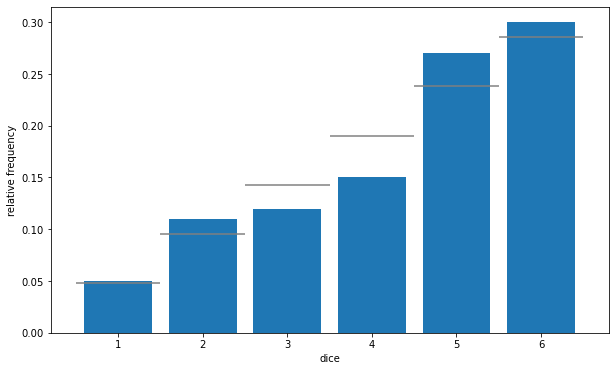

In [92]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8) #rwidth 막대넓이, density 밀도(상대도수로표시)
# 실제의 확률분포를 가로선으로 표시 
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray') # 수평선 y, xmin, xmax를 순서대로 입력하면, 점 (xmin, y)에서 점 (xmax, y)를 따라 수평선을 표시 (min)ㅡ(max)

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

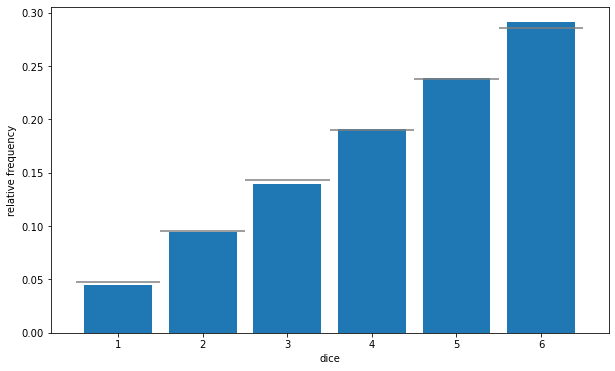

In [99]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추측통계에서의 확률

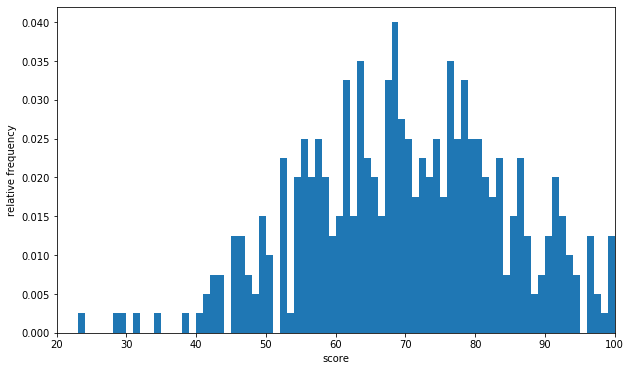

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [20]:
np.random.choice(scores)

63

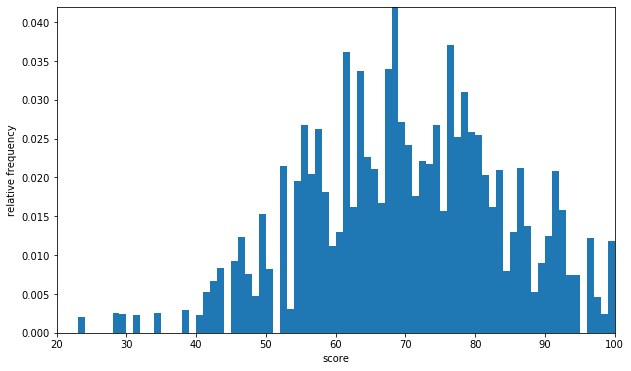

In [21]:
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

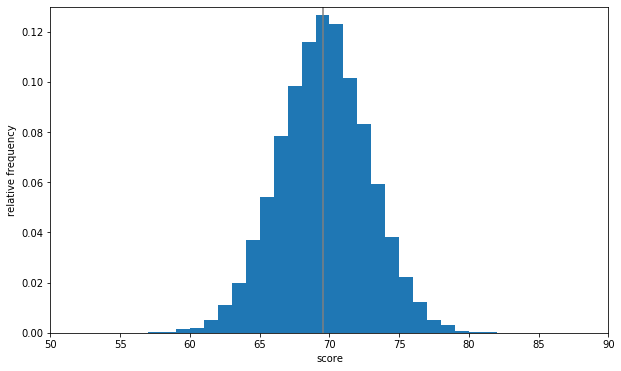

In [22]:
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
#계급수 range(max)/100 ,density밀도함수
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

## 이제부터 배우는 것